### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')

## Load the data
Display the first 5 rows of the data after loading.

In [4]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,0.062800,0.408930,1.208941,2.897574,40.869198,0.007109,0.025200,0.032094,0.011780,0.020624,0.003767,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,0.006794,0.287366,0.530928,2.148714,48.740479,0.003016,0.017410,0.032599,0.006423,0.008430,0.002644,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002826,0.003012,0.000000,0.000000,0.007882,0.000950,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,0.057717,0.227150,0.828900,1.565250,17.602500,0.005237,0.013015,0.015100,0.007516,0.015023,0.002272,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063533,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,0.061770,0.324650,1.141000,2.306000,24.380000,0.006374,0.020210,0.025265,0.011050,0.018780,0.003162,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,0.066188,0.501175,1.466750,3.463750,45.732500,0.008300,0.031993,0.041955,0.014770,0.023203,0.004488,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,0.095750,2.873000,3.896000,21.980000,542.200000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [7]:
#Find the duplicates

df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [9]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

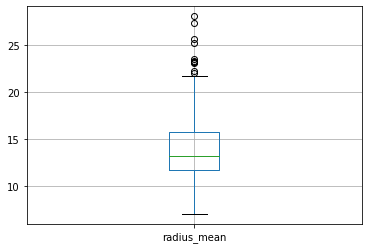

In [10]:
#Boxplot
 
df[['radius_mean']].boxplot()

In [11]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.053013,0.064714,0.053310,0.085935,-0.045771,-0.012110,0.053062,0.034495,-0.078422,-0.042292,0.125892,-0.010739,0.113964,0.176118,0.123051,0.054527,0.067379,0.057801,-0.064726,0.057716,0.060637,0.041220,0.056923,0.098540,-0.007036,-0.009724,0.024639,0.020508,-0.093087,-0.023410
radius_mean,0.053013,1.000000,0.370559,0.997984,0.986661,0.181021,0.531935,0.684128,0.833289,0.110827,-0.331993,0.684046,-0.087534,0.679227,0.729117,-0.227814,0.233671,0.173923,0.374878,-0.105575,-0.041696,0.969835,0.329921,0.964768,0.939238,0.140573,0.466587,0.541233,0.754886,0.148066,0.014259
texture_mean,0.064714,0.370559,1.000000,0.377602,0.371092,0.009188,0.283013,0.343909,0.347076,0.074819,-0.071212,0.317878,0.427460,0.321211,0.298161,0.038002,0.206999,0.137678,0.186839,-0.012439,0.073012,0.402402,0.909448,0.410636,0.400265,0.131954,0.306401,0.329708,0.333799,0.095071,0.135850
perimeter_mean,0.053310,0.997984,0.377602,1.000000,0.986029,0.215509,0.580307,0.720764,0.859523,0.145323,-0.284797,0.696138,-0.074023,0.697652,0.737701,-0.210177,0.275380,0.204652,0.403991,-0.082423,-0.009638,0.969895,0.337438,0.969863,0.939864,0.168529,0.505573,0.575270,0.779149,0.172585,0.055418
area_mean,0.085935,0.986661,0.371092,0.986029,1.000000,0.185633,0.524159,0.696779,0.834096,0.115726,-0.303085,0.746399,-0.058272,0.740162,0.802528,-0.169248,0.243725,0.191596,0.374022,-0.069897,-0.017722,0.962820,0.320911,0.958728,0.958249,0.141403,0.443660,0.528460,0.731554,0.127453,0.011020
smoothness_mean,-0.045771,0.181021,0.009188,0.215509,0.185633,1.000000,0.633941,0.507177,0.536495,0.532225,0.546585,0.267633,0.122879,0.269499,0.226801,0.284216,0.278271,0.231168,0.339563,0.156096,0.222125,0.213582,0.080926,0.238416,0.206867,0.774433,0.450434,0.426570,0.481344,0.354264,0.457513
compactness_mean,-0.012110,0.531935,0.283013,0.580307,0.524159,0.633941,1.000000,0.877536,0.832109,0.581543,0.515431,0.500400,0.097833,0.555467,0.454123,0.108126,0.724252,0.542006,0.630444,0.211784,0.447573,0.559828,0.292928,0.613184,0.533080,0.545285,0.866952,0.810001,0.808524,0.481947,0.659135
concavity_mean,0.053062,0.684128,0.343909,0.720764,0.696779,0.507177,0.877536,1.000000,0.916765,0.474787,0.303101,0.626819,0.111686,0.653508,0.607040,0.085109,0.679806,0.681740,0.690816,0.170403,0.428224,0.691384,0.333262,0.730322,0.681134,0.440080,0.762450,0.885576,0.853648,0.388345,0.498175
concave points_mean,0.034495,0.833289,0.347076,0.859523,0.834096,0.536495,0.832109,0.916765,1.000000,0.416276,0.123031,0.688619,0.054958,0.703480,0.677235,0.007147,0.499940,0.415521,0.610225,0.079873,0.230368,0.835211,0.337172,0.859342,0.814219,0.441862,0.687621,0.752165,0.905909,0.341613,0.347100
symmetry_mean,-0.078422,0.110827,0.074819,0.145323,0.115726,0.532225,0.581543,0.474787,0.416276,1.000000,0.476693,0.269129,0.196430,0.282842,0.184678,0.156855,0.408588,0.348500,0.395309,0.456221,0.312216,0.146293,0.107975,0.179625,0.140769,0.385940,0.449289,0.418030,0.385992,0.695937,0.423496


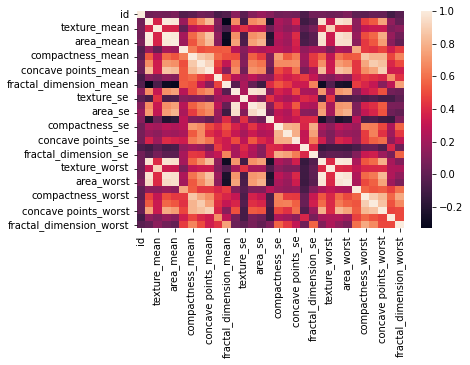

In [12]:
import seaborn as sns
#Correlation plot
 
sns.heatmap(df.corr())

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [13]:
df.shape

(398, 32)

In [38]:

y= df.diagnosis

In [39]:
x=df.drop('diagnosis',axis=1)


In [40]:
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420


In [41]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: diagnosis, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [44]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (398, 32)
shape of input - training set (318, 31)
shape of output - training set (318,)
shape of input - testing set (80, 31)
shape of output - testing set (80,)


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [45]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=0) # Creating a XGB Classifier

In [46]:
xgc.fit(x_train, y_train) # Training the model with fit method

XGBClassifier(max_depth=5, n_estimators=500)

## Evaluate the model using Accuracy Score

In [47]:
predictions = xgc.predict(x_test)
predictions[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9625

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [52]:
!pip install shap

     |████████████████████████████████| 564 kB 10.1 MB/s 


In [53]:
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

In [54]:
# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(x_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: -1.301986


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.023898,-0.001282,0.700887,0.215276,-0.104042,0.091459,0.0,0.322577,1.289115,-0.161954,0.0,-0.046915,-0.000586,0.0,-0.119391,-0.121334,-0.002780,0.0,-0.006506,-0.129922,-0.016155,-0.879311,1.193612,1.306187,0.172660,0.634138,0.0,0.248507,1.609602,0.155362,0.096530
1,-0.691081,-0.006889,-0.515952,-0.236145,-0.191779,0.100405,0.0,-0.183909,-0.712261,0.151431,0.0,-0.010674,-0.002181,0.0,-0.192806,-0.091970,0.030646,0.0,-0.017292,-0.118594,0.002428,-1.492386,0.010140,-1.177125,-0.122763,-0.030238,0.0,-0.200923,-0.412837,0.132704,-0.069715
2,0.880129,-0.007607,0.034116,-0.235222,-0.105950,0.023356,0.0,-0.108171,-0.768018,0.155679,0.0,0.008750,-0.000833,0.0,0.386907,-0.073996,0.029038,0.0,-0.006423,0.118097,0.002976,3.586412,0.621749,1.362119,0.197163,0.493744,0.0,0.192542,-0.319483,0.156768,-0.026213
3,0.690335,-0.006889,-0.750814,-0.230237,-0.195575,-0.052968,0.0,-0.088454,-0.594128,0.151431,0.0,-0.010674,-0.002181,0.0,-0.211550,-0.072186,0.027518,0.0,-0.017292,0.110910,0.002428,-1.364498,-0.697775,-1.055414,-0.131947,-0.484482,0.0,-0.342880,-0.388421,-0.105456,-0.074067
4,-0.817883,-0.006889,-0.462659,-0.236145,-0.208170,-0.043872,0.0,-0.132539,-0.616901,-0.166142,0.0,-0.010674,-0.002181,0.0,-0.236646,-0.091253,-0.035647,0.0,-0.017292,-0.118594,0.002428,-1.497772,-0.803344,-0.481601,0.058900,-0.549655,0.0,-0.208391,-0.364280,0.131655,-0.074067


In [57]:
shap.initjs()
shap.force_plot(explainer.expected_value,
shap_values[:1000,:], x_test.iloc[:1000,:])

## Write your inferences from the generated plot.

Inferences are -- 

At differnt value of point like 

smoothness_mean,compactness_mean,concavity_mean and so on we can derive the diagnosis results by seeing and analyzing the plot.      

Id don't have any impact on the prediction part

radius worst and perimeter worst have similar kind of curveor we can say imapct on prediction part.

  

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [59]:
shap.initjs()
shap.force_plot(explainer.expected_value,
shap_values[:1,:], x_test.iloc[:1,:])


## Write your inferences from the generated plot.

Nothing Useful info is gathered except radius worst have an impact on prediction







# Task 5

## Plot a SHAP force plot for all the rows of the data

In [60]:
df.shape

(398, 32)

In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value,
shap_values[:398,:], x_test.iloc[:398,:])

## Write your inferences from the generated plot.

mean Id - 8.826e+7

for each feature mean is almost same but prediction part is different.



# Task 6

## Plot a SHAP summary plot using all the features in the data

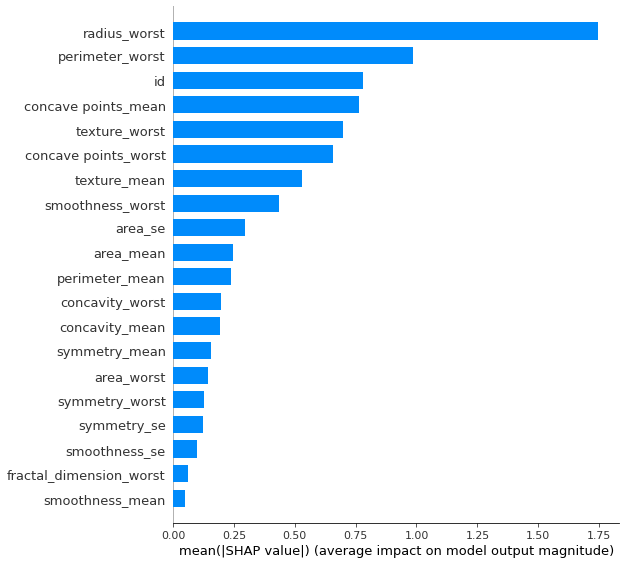

In [64]:
shap.initjs()
shap.summary_plot(shap_values,
x_test, plot_type="bar")

## Write your inferences from the generated plot.

From the above simple bar chart, we observe that radius_worst and perimeter_worst Features are the top 2 important features while determining the diagnosis.

On the other hand, fractal_dimension_worst and smoothness_mean are the least important features while determining the diagnosis.

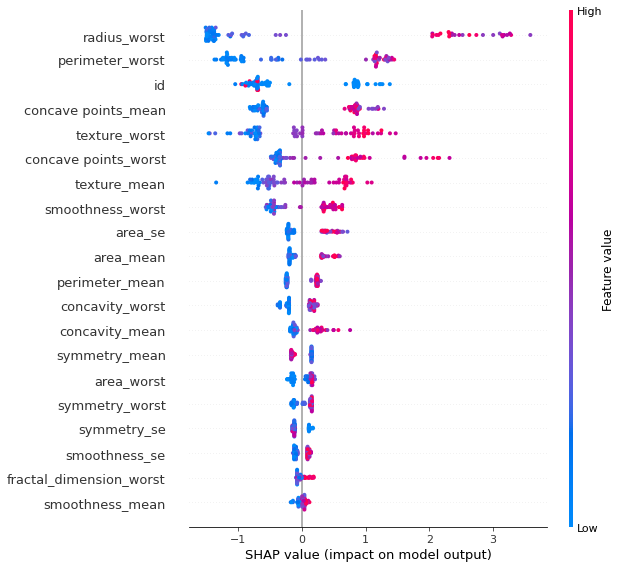

In [66]:
shap.initjs()
shap.summary_plot(shap_values, x_test)

# Task 7

##Plot a SHAP dependecne plot using all features in the data

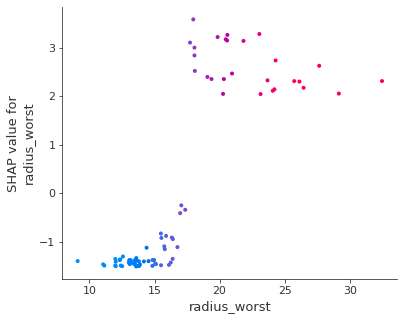

In [69]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='radius_worst',
shap_values=shap_values,
features=x_test)

## Write your inferences from the generated plot.

radius worst is high for more than 20 otherwise it is low.

# Task 8 (Optional)

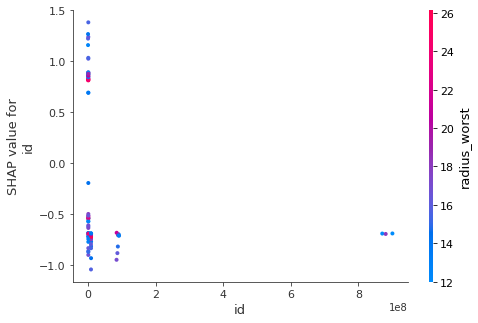

In [73]:
shap.initjs()
shap.dependence_plot(ind='id', interaction_index='radius_worst',
shap_values=shap_values, features=x_test)

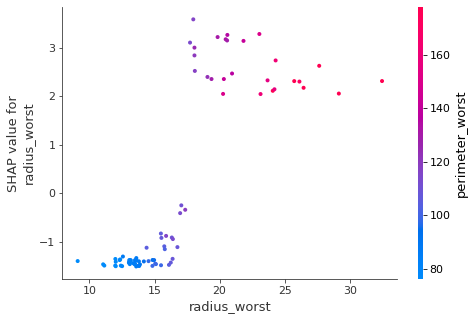

In [75]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='perimeter_worst',
shap_values=shap_values, features=x_test)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.